In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os,sys,time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

In [3]:
X_train.shape

(55000, 28, 28)

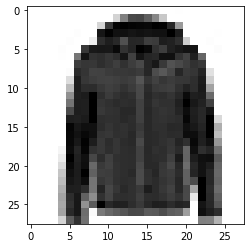

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()
    
show_single_image(X_train[0])

In [5]:
def show_images(n_rows, n_cols, X_data, y_data,class_names):
    assert len(X_data) == len(y_data)
    assert n_rows * n_cols < len(X_data)
    
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(X_data[index],cmap='binary',
                      interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

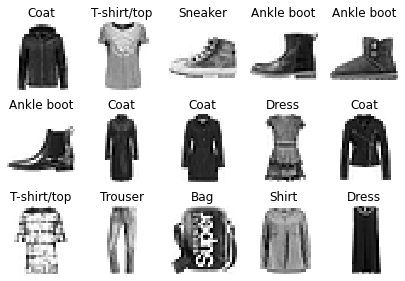

In [6]:
show_images(3,5,X_train,y_train,class_names)

In [7]:
# 使用sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# relu y = max(0,x)
# softmax: 将向量变成概率分布。 x= [x1,x2,x3]
#          y=[e^x1/sum, e^x2/sum, e^x3/sum] sum = e^x1, e^x2, e^x3

#reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

2021-07-26 18:18:48.201112: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
#关于全连接层参数量的解释，第一个全连接层为例
#[None, 784]* W +b =[None, 300] W.shape=[784, 300], b=[300]
# 784*300 + 300 = 235500

In [11]:
X_train.shape

(55000, 28, 28)

In [12]:
history = model.fit(X_train, y_train, epochs=5,
         validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 2.4093 - accuracy: 0.7347 - val_loss: 0.6771 - val_accuracy: 0.7208

2021-07-26 18:18:48.507995: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [13]:
history.history

{'loss': [2.4092907905578613,
  0.582027792930603,
  0.4849221706390381,
  0.43003299832344055,
  0.4162520170211792],
 'accuracy': [0.7347090840339661,
  0.7808545231819153,
  0.8263818025588989,
  0.8441272974014282,
  0.8490909337997437],
 'val_loss': [0.6770660877227783,
  0.5329172611236572,
  0.5572868585586548,
  0.4110381305217743,
  0.45495644211769104],
 'val_accuracy': [0.72079998254776,
  0.8185999989509583,
  0.8083999752998352,
  0.853600025177002,
  0.8447999954223633]}

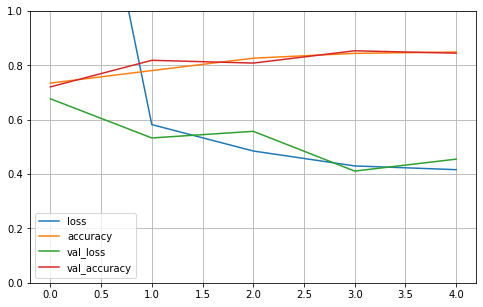

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)